# SyriaTEL Customer Churn Analysis 


## Overview and Data Understanding

### Business Overview

Customer churn analysis has recently become increasingly important in the ever evolving and competitive telecommunication industry. Customer churn analysis involves the study of customer behaviour to identify patterns and factors that lead to customers leaving their providers. As the cost of getting a new customer is five to twenty-five times more than keeping an existing customer, telecommunication as well as mobile operators see the need to pay more attention to retaining existing customers to increase their revenues.

There are myriads of reasons why a customer might leave such as high prices, poor network coverage or customer service. However, one of the most common reasons cited is customers simply getting a better deal elsewhere, especially in markets where there is a lot of competition. Therefore, understanding these churn drivers, even though it’s not straight forward, is critical for not just knowing why customers leave but identifying the warning signs of customers about to terminate contracts or switch providers.

Thus, accurate prediction of customer’s behaviours, using machine learning solutions assists companies in identifying necessary actions to be incorporated into their customer retention management, such as whether to improve the service experience, design proactive campaigns to boost adoption, or re-engage at-risk customers. 

###  Problem Statement

SyriaTel, a telecommunications company in Syria, would like to predict whether a customer will (“soon”) stop doing business with them(“churn”). As such, it would like to get an understanding of the customers' behaviour and accurately pre-empt whether they will stop using their services.

### Objectives

Objectives for this analysis are as set out below:
 - Build a predictive model that shows whether a customer will churn based on the customer data
 - Identify the key factors affecting customer churn amongst SyriaTel customers
 - Identify what aspects of SyriaTel services need more prioritization to prevent customer churn.


###  Metrics of success

The chosen predictive model will be evaluated agains the following metrics. These metrics have been derived based on previous studies done on customer churn analysis and as such, each is a range to cater for the variation in the study results:
 - `Accuracy`: Measures the total number of correctly identified instances. An accuracy of between 75% and 85% is desired.
 - `Precision`: Measures how the predictive model is observing the actual number of positives against the predicted positives. A precision of between 50% and 60% is desired.
 - `Recall`: Measures the predictive model's ability to correctly identify churners. A recall of between 60% and 70% is desired.
 - `F1-score`: Measures how accurate the predictive model’s performance is. A F1 score of between 0.55 and 0.65 is highly desirable
 - `Area under the curve (AUC)`: A higher result indicates a more accurate model performance. 

### Data Understanding

The SyriaTel Dataset used in in this analysis has been sourced from Kaggle (https://www.kaggle.com/) and contains records of the company's customers. 

We will begin by importing the data and observing its characteristics.  

In [1]:
#Import Libraries to be used in this analysis
import ProjectFunctions as pj #Custom made library that houses all the functions generated as part of this analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score, accuracy_score, f1_score 
from sklearn.metrics import classification_report,roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


%matplotlib inline

In [2]:
#Use load_data function in ProjectFunctions to load the data and get a view of the top 5 rows

tel_df = pj.load_data("SyriaTel_Data.csv")
tel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:

"""
Use describe_data function in ProjectFunctions to get additional details on the data, Specifically:
1. Shape - Dataset is made up of 21 columns and 3333 rows
2. Info
3. DataDescription
"""

pj.describe_data(tel_df)

------------------Data Shape-------------------
(3333, 21)

----------------Data Info--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   

As can be observed from the output above, here's a summary of the data:

1. **Shape**: The dataset is made up of 3333 rows and 21 columns.


2. **Data Information**: The dataset contains mostly numeric columns with a few text columns. Text columns include `state`, `phone number`,`international plan`,`voice mail plan`


3. **Data description**: On average, duration of time spent on the phone is roughly the same during the evening and night, roughly 200 minutes. This is higher than the average time spent on the phone during the day. Also, the average number of calls as well as the corresponding standard deviation seem to be roughly the same regardless of time of day. However, the amount charged is lowest at night with the day having the highest charge on average. 



## Data Preparation and Analysis

### Data Preparation

Given we have a view of how our data looks like, the next step is to check for the following:

1. **Null values**: As observed in the output below, the dataset does not contain any missing data. As such there is no need to impute values and we will use the values as they are in the dataset


2. **Duplicate values**: Similarly, from the output below, the dataset does not contain any duplicate values. No additional modification is required on this end.






In [4]:
# Check for missing values and duplicates using the inbuilt function analyse_data

pj.analyse_data(tel_df)

---------------------Missing Values-----------------
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


 ----------------Duplicates---------------------
0


 3.  **Outliers** : To check for the outliers, we will need to do a couple of box plots on the numerical variables. Thus, we will split our columns into categorical(text) and numerical categories as follows:
 
 

In [5]:
#Split the columns in the dataset into numerical and categorical columns

cat_columns= []
num_columns = []

for col in tel_df.columns:
    if tel_df[col].dtype == 'object':
        cat_columns.append(col)
    else:
        num_columns.append(col)

print('Categorical columns:', cat_columns)
print("\n")
print('Numerical columns:', num_columns)


Categorical columns: ['state', 'phone number', 'international plan', 'voice mail plan']


Numerical columns: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


As we have managed to isolate the categorical columns from the numerical columns, we can use box plots on the numerical columns to check for any outliers. 

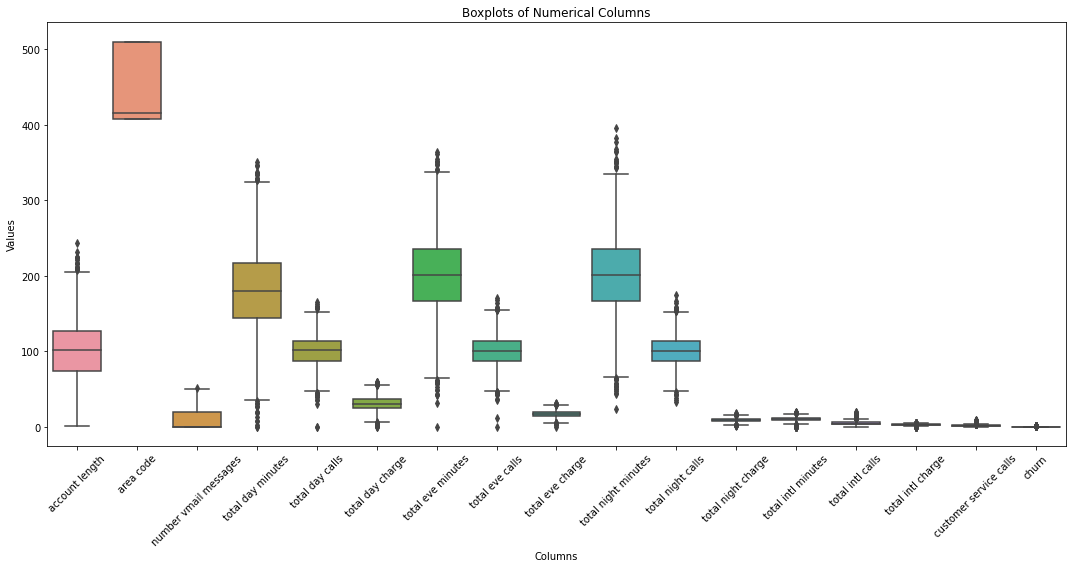

In [6]:
#Boxplots of the various numerical variables to check for outliers

melted_df = tel_df[num_columns].melt(var_name="Feature", value_name="Value")

fig,ax = plt.subplots(figsize =(15,8))
sns.boxplot(x="Feature", y="Value", data=melted_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.set_title("Boxplots of Numerical Columns")
ax.set_ylabel("Values")
ax.set_xlabel("Columns")
plt.tight_layout(); 

From the box plot output above, we can observe that majority of the columns have a few outliers as expected given that the calling patterns may differ from customer to customer with some being far removed from the average. However, we observe that the pattern is similar amongst the different features we are looking at. For instance, the number of calls has similar pattern of outliers regardless of whether it's day, evening or night period. This phenomenom is replicated in the phone charges as well as the number of minutes. Therefore, we will keep these outliers for our analysis to give us a better understanding of the customer patterns. In addition, `area code` does seem to be a `text` data type categorised as an `integer`. A value count analysis of the column confirms this.  


In [7]:
#Checking the value counts of "area code"

tel_df["area code"].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64


### Exploratory Data Analysis

From the data preparation step above, we now have a complete dataset that we can now use for our analysis. This exploratory data analysis will be divided into three sections:

1. **Univariate analysis** - Analyzing the different features independently
2. **Bivariate Analysis** - Analyzing the relationship between two features
3. **Multivariate Analysis** - Analyzing relationship between more than two features

#### 1. Univariate Analysis

In this section we look at the numerical and categorical columns separately to understand the distribution of the data as well as give us an idea of which columns we can use as features to our modelling.

##### Numerical Columns

**Note**: From the numerical columns above, we will remove the `churn` column given it has boolean values


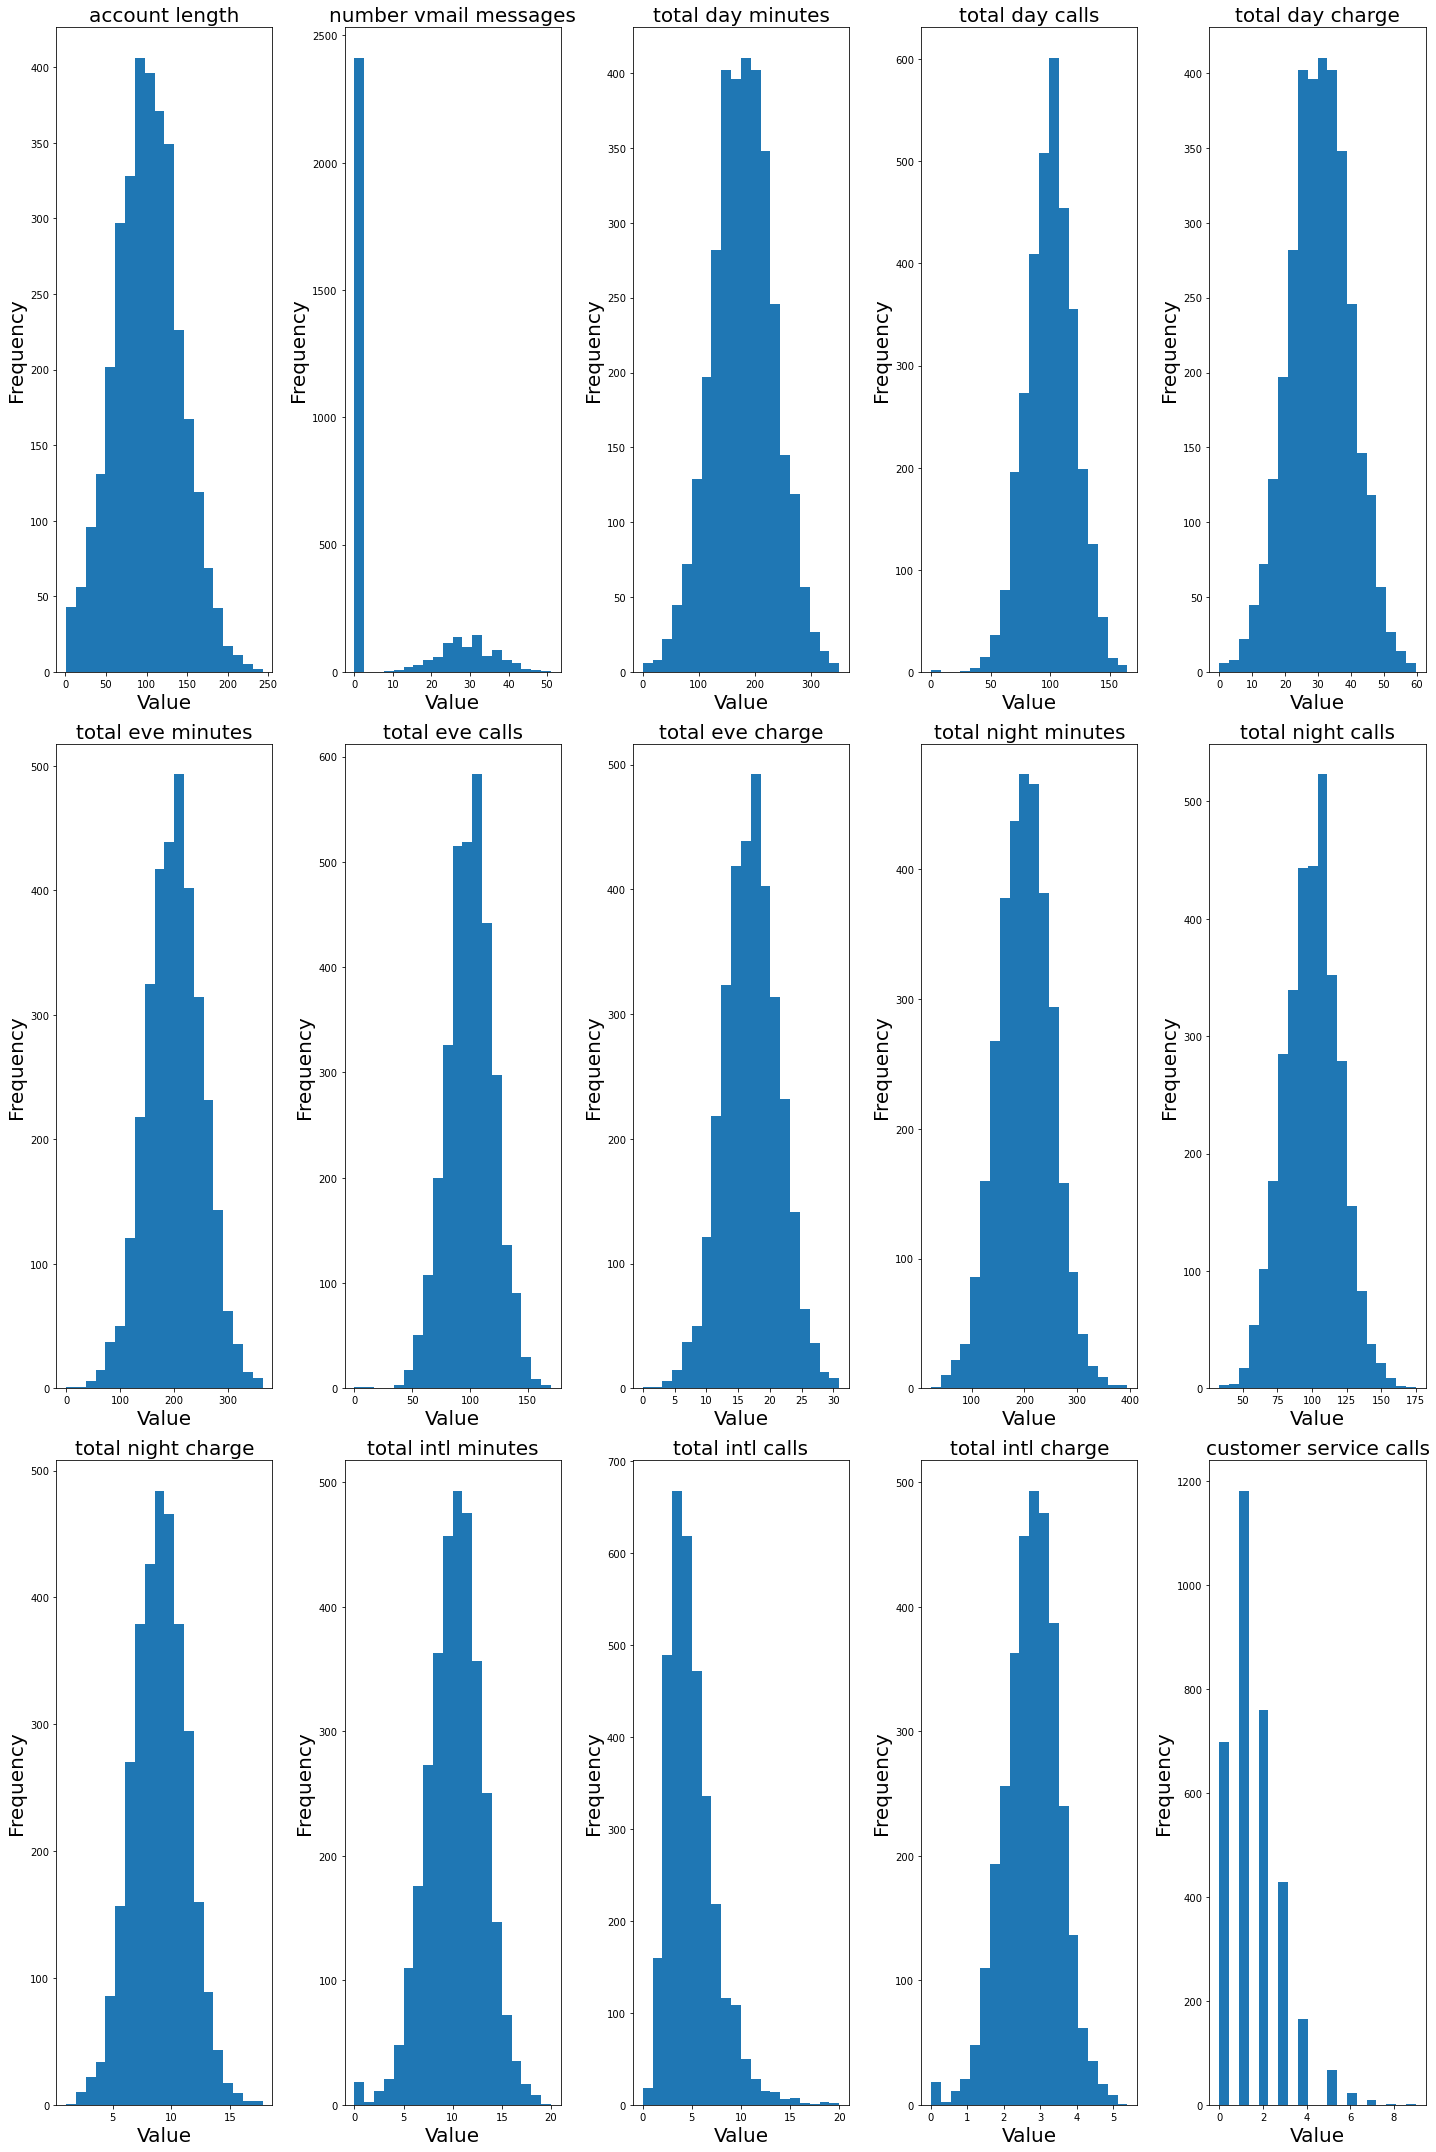

In [8]:
# Create subplots for each numerical columns to determine the distribution of the data
# Removing area code as it is a categorical colum but has integer data type 

num_cols_analyse = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge',
'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


fig, axes = plt.subplots(nrows= 3, ncols= 5, figsize=(20, 30))

for i, var in enumerate(num_cols_analyse):
    row = i // 5
    col = i % 5
    axes[row, col].hist(tel_df[var], bins=20)
    axes[row, col].set_title(var,fontsize=20)
    axes[row, col].set_xlabel('Value',fontsize=20)
    axes[row, col].set_ylabel('Frequency',fontsize=20)

plt.tight_layout();

From the output above, it is evident that most of the numerical variables are normally distributed. However `total intl calls` looks to be slightly positively skewed. `number vmail messages`, on the other hand, is extremely positively skewed as majority of the customers rarely have voicemail messages. Also, we can deduce that majority of the SyriaTel customers do not use the voice mail messaging services and rarely contact customer service as roughly 1200 only contacted the customer care once.

##### Categorical columns

We will split these into two sections:

1. **Plan details**

**Note**: From the categorical columns defined above, we will remove the `phone number` and `state` column and plot similar histograms to check their distributions.


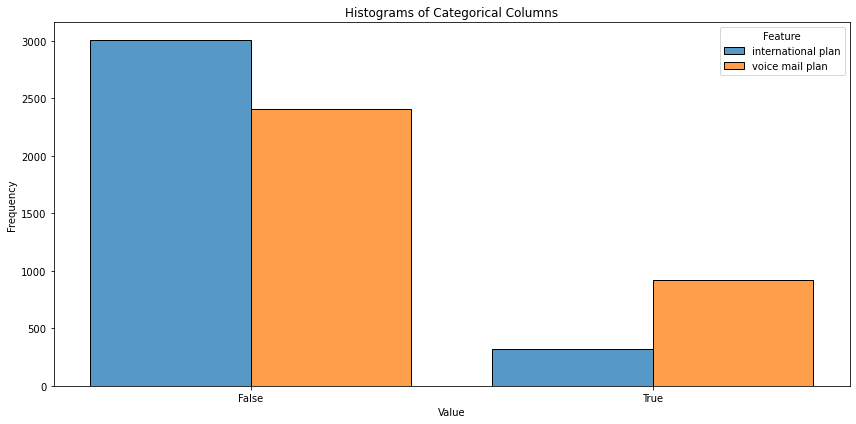

In [9]:
#Code to plot the histogram of the two category columns to check their distribution

cat_cols_to_analyse = [ 'international plan', 'voice mail plan']
df_cat = tel_df[cat_cols_to_analyse]

melted_df_2 = df_cat.melt(var_name="Feature", value_name="Value")
melted_df_2

plt.figure(figsize=(12, 6))
sns.histplot(data=melted_df_2, x="Value", hue="Feature", multiple="dodge", shrink=0.8, bins=2, discrete=True)

# Customize the plot
plt.xticks([0, 1], ['False', 'True'])  # Rename x-axis ticks
plt.title("Histograms of Categorical Columns")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout();


We observe that roughly 3000 SyriaTel customers do not have an international plan, while roughly 2,400 customers do not have a voicemail plan. Thereofe, it does seem these two services are not popular amongst SyriaTel customers.

2. **Churn**

This is the categorical column we are most interested in as it tells us how many of the customers have churned.This will also be our target variable when it comes to building our predictive model. Let's do a similar histogram to see how the values align:


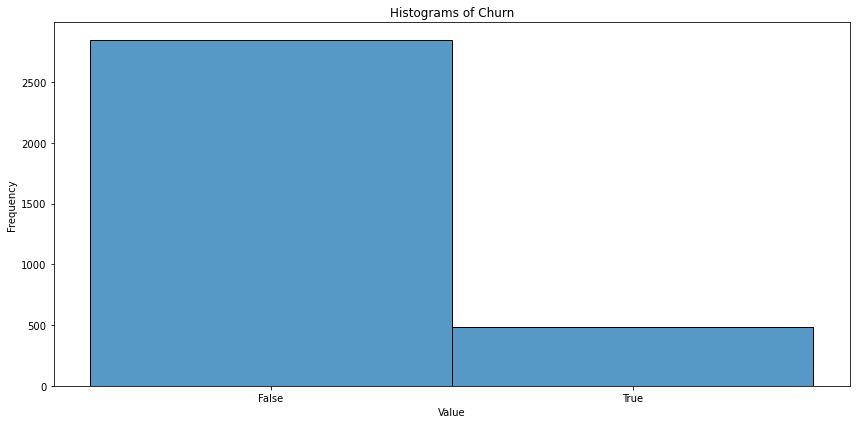

In [10]:
#Plot to show the distribution of Churn amongst SyriaTel customers

plt.figure(figsize=(12, 6))
sns.histplot(tel_df["churn"].astype(int),bins=2,discrete=True)

# Customize the plot
plt.xticks([0, 1],['False', 'True'])  # Rename x-axis ticks
plt.title("Histograms of Churn")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.tight_layout();

From the histogram above, we do observe that a lot of the customers have not churned. Roughly 2,800 customers are still with SyriaTel while roughly 500 have left. Thus, it is imperative to understand the reason behind the 500 customers leaving. We confirm these proprotions by doing a value count below. 


In [11]:
print(tel_df["churn"].value_counts())
print("\n")
print(tel_df["churn"].value_counts(normalize = True))

False    2850
True      483
Name: churn, dtype: int64


False    0.855086
True     0.144914
Name: churn, dtype: float64


#### 2. Bivariate Analysis

In this section we will be exploring the relationship between our target variable `churn` and other data features. We will split this sectiion into numerical and categorical features:

1. **Relationship between Churn and the Categorical Features**

The two main categorical features we will be looking at are `international plan` and `voice mail plan`. To determine this relationship, we will generate a countplot as shown below:


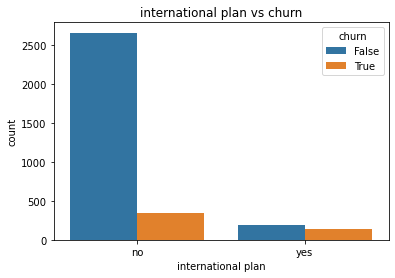

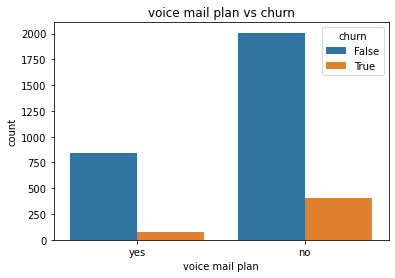

In [12]:
#Use countplot function in ProjectFunctions to plot the relationship of the two categorical variables "international Plan
#and "voice mail plan"

pj.countplot("international plan",tel_df)
pj.countplot("voice mail plan",tel_df)


As can be observed in the countplots above, the number of customers who churned are much lower regardless of whether they were on the international plan or not. Similar pattern is observed with customers on the voicemail plan. However, the proportion of customers who churned compared to those who are still active is much more pronounced on the voicemail plan. This proportion is quite close on the international plan. With regards to those who did not churn, the proportions are roughly the same across the voice mail and international plan.   

2. **Relationship between Churn and the Numeric Features**
    
    a. **Relationship between churn and total minutes**
    
    We start by checking how the number of minutes spent on the phone by SyriaTel customers affects the likelihood of churn by plotting the box plots below:

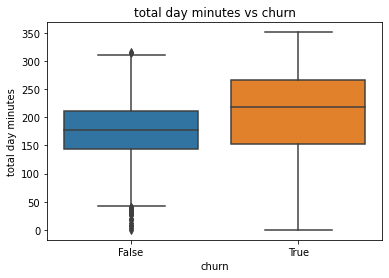

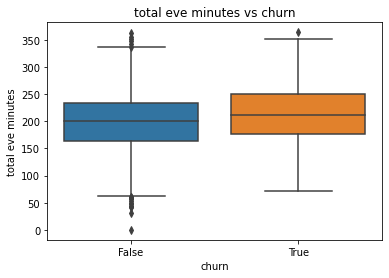

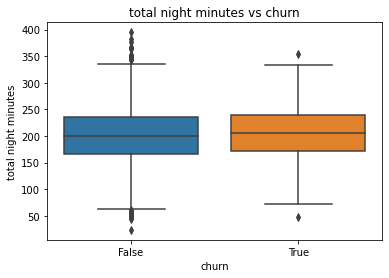

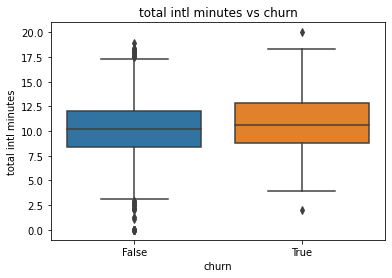

In [13]:
#Using the boxplot function in ProjectFunctions to plot the relationship between churn and total number of phone minutes 

pj.boxplot("churn","total day minutes", tel_df)
pj.boxplot("churn","total eve minutes", tel_df)
pj.boxplot("churn","total night minutes", tel_df)
pj.boxplot("churn","total intl minutes", tel_df)

As can be observed by the box plots above, customers who churned had a higher median number of minutes spent on the phone. This is quite evident during the day period where customers who churned spent a median period of around 200 minutes on the phone compared to 180 minutes for the active customers. As for the evening and night, the difference is quite negligible with both sets of customers(those who churned and those who didn't) having a similar median time spent on the phone. The variation observed is also quite similar amongst the both sets of customers. A huge difference is observed in the amount spent on total international minutes as customers spent a median duration of 10 minutes, which is quite removed from the day to day calling periods.  

b. **Relationship between churn and total calls**
    
Secondly, we check the relationship between total calls made by SyriaTel customers and the likelihood of churn by plotting the box plots below:

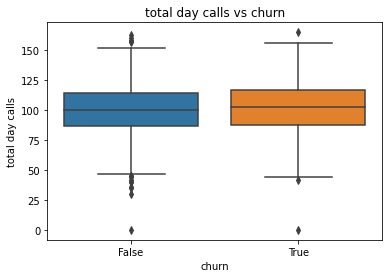

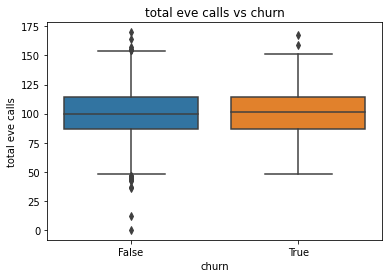

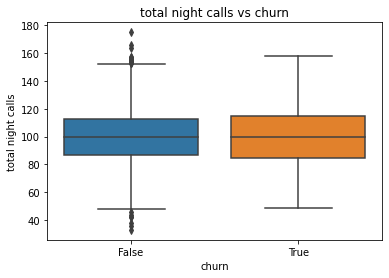

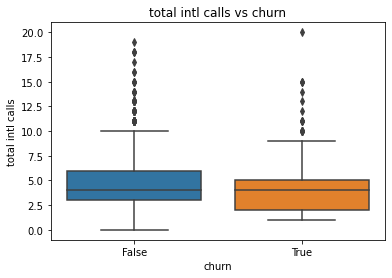

In [14]:
#Using the boxplot function in ProjectFunctions to plot the relationship between churn and total number of phone calls

pj.boxplot("churn","total day calls", tel_df)
pj.boxplot("churn","total eve calls", tel_df)
pj.boxplot("churn","total night calls", tel_df)
pj.boxplot("churn","total intl calls", tel_df)

Contrary to what we observed in the relationship between churn and total minutes, we see there being no difference between the customers who churned and those who are active when it comes to the number of calls. Of importance to note, is that we see the similar number of calls during the day, evening and night (roughly a median of 100 calls). Variation is also similar when looking at the number of calls made through out the day.

International calls on the other hand, had fewer number of calls observed (median of around 5 calls). In addition, customers who churned tend to be skewed to making less international calls compared to active customers who actually make more international calls. Finally, there a few outliers observed here, with the customers who churned having a wider variation 

c. **Relationship between churn and total charges**

We now look into the relationship between total call charges to SyriaTel customers and the likelihood of churn by plotting the box plots below:

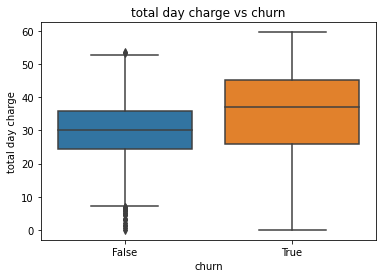

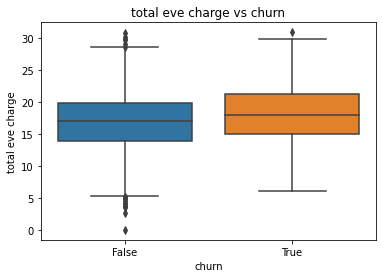

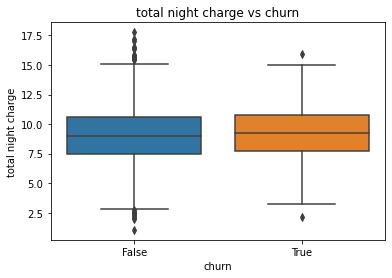

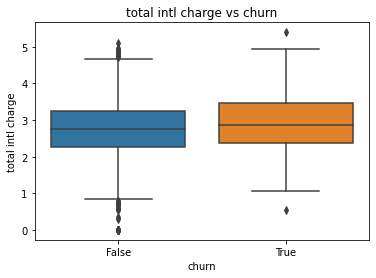

In [15]:
#Using the boxplot function in ProjectFunctions to plot the relationship between churn and total charges

pj.boxplot("churn","total day charge", tel_df)
pj.boxplot("churn","total eve charge", tel_df)
pj.boxplot("churn","total night charge", tel_df)
pj.boxplot("churn","total intl charge", tel_df)


We observe that the total charges are higher for customers who churn compared to the active customers. The charge is the highest for calls made during the day and it reduces as the day progresses to the evening and night. During the day, customers who churned paid a median of around 35 dollars while those who did not churn paid roughly 30 dollars. This is quite a steep difference and it could explain why some of the customers are leaving. 

In addition for international calls, customers who churned spent slightly higher on phone charges compared to those who didn't. Given, customers who churned also spent the most time on international calls, it would be great to offer them lower rates to retain them. 

d. **Relationship between churn and customer service**

We now look into the relationship between customer service calls made by SyriaTel customers and the likelihood of churn by plotting the countlot below:

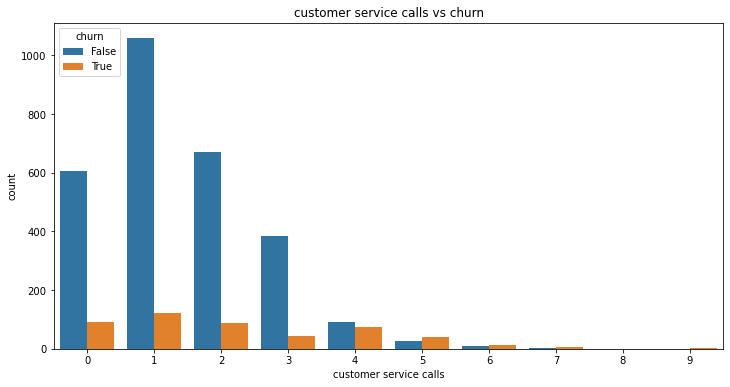

In [16]:
plt.figure(figsize=(12, 6))
pj.countplot("customer service calls",tel_df)

The countplot shows that customer who did not churn made the least number of calls to the customer care service, with most calling just once. This number reduces as the number of customer service calls increases. However, customers who churned did make a lot more calls, based on the pattern observed with the number fluctuating as the number of customer service calls increases. This could be as a result of persistent issues they are facing hence the need to call custommer care. There is a likelihood that they most likely churned if their issue was not resolved or if they got poor customer service.

#### 3. Multivariate analysis

Final step of this exploratory data analysis is to perform an analysis of all the numeric variables and check if we are able to map out any relationships.  

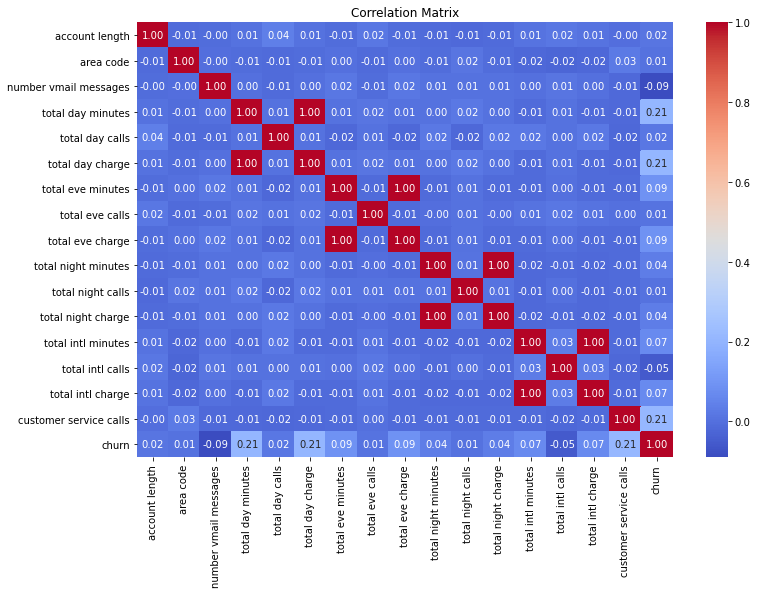

In [17]:
# calculate the correlation matrix and visulaize this using a heatmap in Seaborn
plt.figure(figsize=(12, 8))
correlation_matrix = tel_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the heatmap above, we can observe that strong correlations where red dominates, especially along total minutes, total charges, and corresponding times of day (e.g., day, evening, and night variables).  On the other hand, weak correlations are visible in a lot of the  pairs, with many correlations close to 0. The most highly positively correlated variables with `churn` are `total day minutes`, `total day charge`, `total international charge` and `customer service calls`. On the other hand we do observe a negative correlation of `churn` with `num vmail messages`. We can therefore deduce that the presence of a service allows customers to have vmail messages helps in retaining/attracting customers. However, the total day charges, international charges are quite prohibitive. These charges coupled with customer service could be the causes of customers leaving SyriaTel. 

## Modelling
### Data Preprocessing

Following the exploratory data analysis, we begin processing our data in line with findings from the EDA to prepare it for modelling 

a. **Drop irrelevant columns**

We need to drop all the columns that won't be utilised going forward. As a start let's have a view of all the columns in the dataframe `tel_df`



In [18]:
#list all the columns in the tel_df dataframe
tel_df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

The following columns will be dropped from the analysis:
 - `state` and `area code` : Contains the location of the customer, which would be useful in an inferential study but not a predictive study similar to this.
 - `account length` and `phone number`:Contain the customer's unique indentifier which does not necessarily provide us with information that would be useful in predicting churn.
 - `total day minutes`, `total eve minutes` , `total night minutes` an `total intl minutes`: From the correlation matrix, these are correlated with  `total day charge`,`total eve charge`,`total night charge` and `total intl charge` respectively. To prevent multicollinearity of features we need to remove one of the columns for a more robust model.

In [19]:
# Remove all the unwanted columns and create a new dataframe modified_tel_df containing columns to be used going forward

modified_tel_df = tel_df.drop(columns = ["state","area code","account length","phone number","total day minutes",
                                         "total eve minutes","total night minutes","total intl minutes"])
modified_tel_df.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

b. **Label encode the categorical variables**

The following binary categorical variables are mapped to numbers (0 and 1):

- `international plan`
- `voice mail plan`
- `churn`



In [20]:
#Checking the value counts of these variables

print(modified_tel_df["international plan"].value_counts())
print("\n")
print(modified_tel_df["voice mail plan"].value_counts())
print("\n")
print(modified_tel_df["churn"].value_counts())

no     3010
yes     323
Name: international plan, dtype: int64


no     2411
yes     922
Name: voice mail plan, dtype: int64


False    2850
True      483
Name: churn, dtype: int64


In [21]:
#Applying the mapping  to label encode these columns

modified_tel_df["international plan"] = modified_tel_df["international plan"].map({"yes": 1, "no": 0})
modified_tel_df["voice mail plan"] = modified_tel_df["voice mail plan"].map({"yes": 1, "no": 0})
modified_tel_df["churn"] = modified_tel_df["churn"].map({True: 1, False: 0})


In [22]:
#Confirming that the changes have been applied

print(modified_tel_df["international plan"].value_counts())
print("\n")
print(modified_tel_df["voice mail plan"].value_counts())
print("\n")
print(modified_tel_df["churn"].value_counts())

0    3010
1     323
Name: international plan, dtype: int64


0    2411
1     922
Name: voice mail plan, dtype: int64


0    2850
1     483
Name: churn, dtype: int64


In [23]:
#Confirming that these changes have been applied correctly to our dataframe

modified_tel_df.head()

,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


c. **Identify target and features**

Next step is ito dentify which columns represent features and which column represents the target. Recall that in this instance, we are trying to predict customer churn. In the cell below,  we assign `X` to be the features and `y` to be the target.



In [24]:
#Splitting columns to features and target

X = modified_tel_df.drop("churn",axis=1)
y = modified_tel_df["churn"]

d.**Check for imbalance in the target variable**

As can be observed below, we do have a clear imbalance in our target variable `churn` given majority of the customers are still with Syria Tel. Therefore if we had a model that always picked customers who did not churn (majority class) then we would expect an accuracy score of around 86%. This clas imbalance issue will be looked at as part of building the model.



In [25]:
#value counts of our target variable 
print("-------------Distribution of Churn----------")
print(y.value_counts())
print("\n")
print(y.value_counts(normalize = True))

-------------Distribution of Churn----------
0    2850
1     483
Name: churn, dtype: int64


0    0.855086
1    0.144914
Name: churn, dtype: float64


e. **Perform a train test split**

Create variables X_train, X_test, y_train, and y_test using train_test_split with `X`, `y`, `stratify`  = y, and `random_state`=42.

In [26]:
#Perform train test split with stratify = y to ensure an even balance of the two sets of customers

X_train, X_test, y_train, y_test =train_test_split(X, y, stratify =y , random_state = 42)

# Check for the percentage splits in the train and test data
print("Train percent not churned/churned:", y_train.value_counts(normalize=True)[1])
print("Test percent not churned/churned: ", y_test.value_counts(normalize=True)[1])

Train percent not churned/churned: 0.1448579431772709
Test percent not churned/churned:  0.145083932853717


### Building and evaluating the baseline model
Our baseline model will be a `logistic` regression using the inbuilt model parameters. We will specify a random state to ensure we get  similar results everytime we run the model.

Using scikit-learn's `LogisticRegression` model, instantiate a classifier with `random_state`=42.


In [27]:
# Instantiate the baseline_model
baseline_model = LogisticRegression(random_state = 42)

To ensure we don't have any convergence issues, we will start by scaling both the train and test data features. 

In [28]:
#Scaling the features to reduce convergence warnings

scaler = StandardScaler()
# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

 # Transform X_test
X_test_scaled = scaler.transform(X_test)

Now we will fit `X_train_scaled` and `y_train` to our baseline model and evaluate the results on the train and test data

In [29]:
#Fit the model using X_train and y_train

baseline_model.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

To evaluate the model, we will proceed with plotting the ROC and displaying the AUC. In addition, we will also output the confusion matrix as well as precision, accuracy, recall and F1 score metrics. These will be used to compare how our future models perform. 

In [30]:
#Predictions based on our baseline model on test and train data

y_pred_train = baseline_model.predict(X_train_scaled)
y_pred_test =baseline_model.predict(X_test_scaled)


In [31]:
#Evaluation metrics for the baseline model on training data

pj.evaluation_metrics(y_train,y_pred_train, baseline_model)

Precision for LogisticRegression(random_state=42) = 0.5474452554744526


Recall for LogisticRegression(random_state=42) = 0.20718232044198895


Accuracy for LogisticRegression(random_state=42) = 0.860344137655062


F1 score for LogisticRegression(random_state=42)  = 0.30060120240480964


In [32]:
#Evaluation metrics for the baseline model on test data

pj.evaluation_metrics(y_test,y_pred_test, baseline_model)

Precision for LogisticRegression(random_state=42) = 0.5370370370370371


Recall for LogisticRegression(random_state=42) = 0.2396694214876033


Accuracy for LogisticRegression(random_state=42) = 0.8597122302158273


F1 score for LogisticRegression(random_state=42)  = 0.3314285714285715


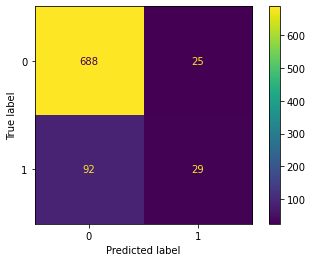

In [33]:
#Confusion matrix on test data

cnf_matrix = confusion_matrix(y_test,y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot();

AUC: 0.8110416932296316


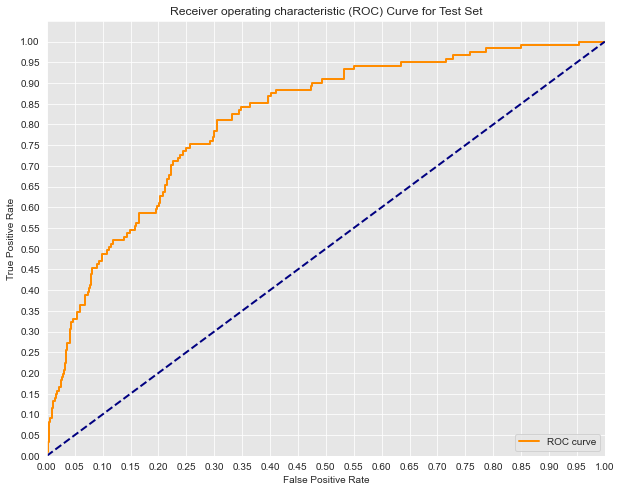

In [34]:
#ROC and AUC for the baseline model based on test data

pj.roc_auc(baseline_model, X_train_scaled, X_test_scaled, y_train, y_test)

Based on the evaluation metrics above, the baseline model has an AUC of 0.811. In addition, the recall is around 24% and the precision is at 53%. Accuracy is at 86 % which is similar to a model that predicts the majority class all the time(customers who did not churn). Looking at the confusion matrix we can see that the number of false negatives are quite high at 92 (i.e.customers who have churned but are classified as if they did not churn). Thus, it does seem the model is penalizing the minority class due to the class imbalance. We will now proceed with building additional logistic regression models by tweaking the hyperparameters to rectify this imbalance.  

### Building and evaluating additional logistic regression models
We will proceed with building other logistic regression models by tweaking some of the hyperparameters in our baseline model. As a start, let's have a look at the parameters in our baseline model.


In [35]:
baseline_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Logistic model with balanced class weights



Due to the class imbalance we have noticed in our target variable `churn`, the model is biased towards predicting the majority class (customers who did not churn).This has lead to poor performance on the minority class, which happens to be our class of interest i.e. customers who churned. 

Thus setting `class_weight`="balanced" adjusts the weights assigned to each class in the loss function inversely proportional to their frequency in the training data. Therefore, the minority class receives a higher weight, increasing its influence on the model during training while the majority class receives a lower weight, reducing its dominance in the model's decisions. Applying resampling technique like SMOTE would lead to overfitting in this case.


In [36]:
#Instantiate a Logistic model with balanced class weights 

model_with_weights= LogisticRegression(class_weight = "balanced", random_state = 42)

#Fit the model to X_train_scaled and y_train
model_with_weights.fit(X_train_scaled,y_train)

#Predictions based on our baseline model on test and train data

y_pred_train_weights = model_with_weights.predict(X_train_scaled)
y_pred_test_weights = model_with_weights.predict(X_test_scaled)

In [37]:
#Evaluation metrics for the baseline model on training data

pj.evaluation_metrics(y_train,y_pred_train_weights, model_with_weights)

Precision for LogisticRegression(class_weight='balanced', random_state=42) = 0.3660130718954248


Recall for LogisticRegression(class_weight='balanced', random_state=42) = 0.7734806629834254


Accuracy for LogisticRegression(class_weight='balanced', random_state=42) = 0.773109243697479


F1 score for LogisticRegression(class_weight='balanced', random_state=42)  = 0.4968944099378882


In [38]:
#Evaluation metrics for the baseline model on training data

pj.evaluation_metrics(y_test,y_pred_test_weights, model_with_weights)

Precision for LogisticRegression(class_weight='balanced', random_state=42) = 0.3412698412698413


Recall for LogisticRegression(class_weight='balanced', random_state=42) = 0.7107438016528925


Accuracy for LogisticRegression(class_weight='balanced', random_state=42) = 0.7589928057553957


F1 score for LogisticRegression(class_weight='balanced', random_state=42)  = 0.4611260053619303


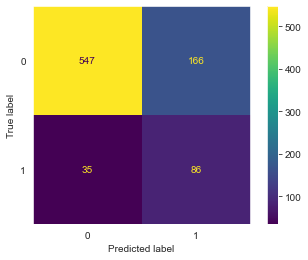

In [39]:
#Confusion matrix on test data

cnf_matrix = confusion_matrix(y_test,y_pred_test_weights)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.grid(False);

AUC: 0.814426297914759


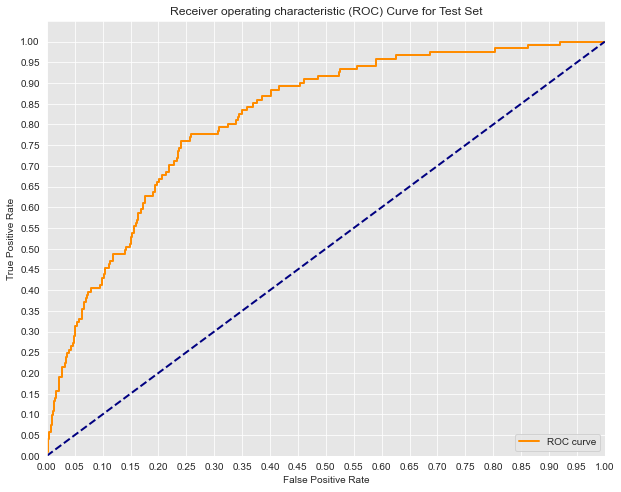

In [40]:
#ROC and AUC for the baseline model using the training data following SMOTE resampling

pj.roc_auc(model_with_weights, X_train_scaled, X_test_scaled, y_train, y_test)

The AUC of this model is slightly higher than the baseline model AUC of 0.811 indicating better model performance. In addition, the test recall has jumped from 23% to 77%. F1 score has also gone up from 0.33 to 0.46 hence model seems to be capturing customers who churned much better than the baseline model. This is evident in the confusion matrix, where the number of false negatives has reduced from 92 customers to 35 customers.

Comparing our test to training metrics, we seem to be getting slightly better metrics on the training data hence indicating that we could be overfitting.



### Logistic model with increased regularization

One of the hyperparameters `C` which is a measure of regularization, has been set to 1 in our baseline model. We will increase regularization to reduce the overfitting by reducing `C` to  a small number (0.1). In the cell below, we then instantiate a `LogisticRegression` model with higher regularization (i.e. lower C), along with `random_state`=42. We will call this model `model_increased_regularization`. 

We will then fit `X_train_scaled` and `y_train_` to the model. 

In [41]:
#Instantiate the Logistic regression model with C=1e12 and random_state = 42

model_increased_regularization = LogisticRegression(C=0.1, class_weight = "balanced", random_state = 42)

#Fit X_train_oversampled and y_train_oversampled
model_increased_regularization.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42)

In [42]:
#Predicting the results based on model_reduced_regularization
y_pred_incr_reg_train =model_increased_regularization.predict(X_train_scaled)
y_pred_incr_reg_test =model_increased_regularization.predict(X_test_scaled)

In [45]:
#Evaluation metrics for the model reduce_regularization on training data

pj.evaluation_metrics(y_train,y_pred_incr_reg_train, model_increased_regularization)

Precision for LogisticRegression(C=0.1, class_weight='balanced', random_state=42) = 0.36150845253576075


Recall for LogisticRegression(C=0.1, class_weight='balanced', random_state=42) = 0.7679558011049724


Accuracy for LogisticRegression(C=0.1, class_weight='balanced', random_state=42) = 0.7699079631852741


F1 score for LogisticRegression(C=0.1, class_weight='balanced', random_state=42)  = 0.49160035366931926


In [48]:
#Evaluation metrics for the model reduce_regularization on test data

pj.evaluation_metrics(y_test,y_pred_incr_reg_test, model_increased_regularization)

Precision for LogisticRegression(C=0.1, class_weight='balanced', random_state=42) = 0.344


Recall for LogisticRegression(C=0.1, class_weight='balanced', random_state=42) = 0.7107438016528925


Accuracy for LogisticRegression(C=0.1, class_weight='balanced', random_state=42) = 0.7613908872901679


F1 score for LogisticRegression(C=0.1, class_weight='balanced', random_state=42)  = 0.46361185983827485


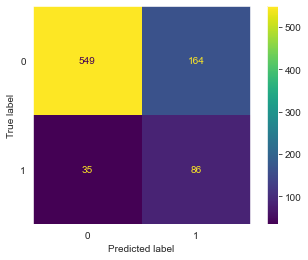

In [49]:
#Confusion Matrix

cnf_matrix = confusion_matrix(y_test,y_pred_incr_reg_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.grid(False);


AUC: 0.8144842534744359


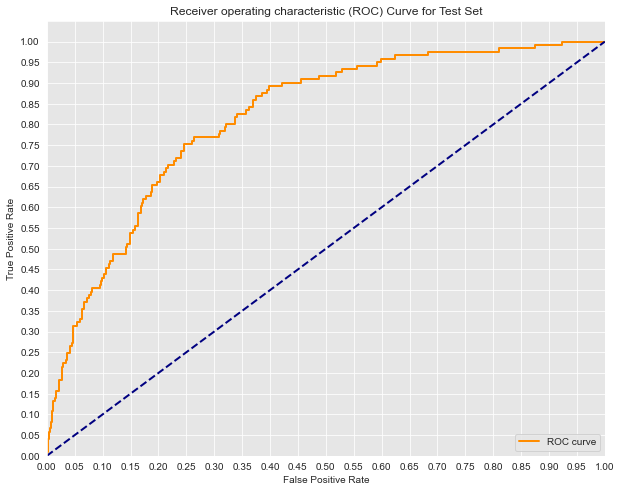

In [50]:
#AUC and ROC curve for the model with higher regularization
pj.roc_auc(model_increased_regularization, X_train_scaled, X_test_scaled, y_train, y_test)

After increasing regularization, we see no major difference in the AUC of the model. The metrics are slightly better compared to the `model_with_weights`, i.e. precison, recall, accuracy and F1 score have slightly increased. Even though it's not a big change, we will proceed with this low regularization. 

### Logistic model with different solver and more iterations

Finally, let's create a model using the `liblinear` solver given we are not getting better results with the default solver `lbfgs`.In additional we will set the penalty to `l1`(Lasso) and increase the max iterations `max_iter` to 10,000 to allow the gradient descent algorithm to take more steps in finding an optimal solution. 

In [51]:
#Instantiate the Logistic regression model with solver = liblinear, random_state = 42, 

model_alt_solver = LogisticRegression(C=0.1, class_weight = "balanced", solver = "liblinear" , penalty ="l1",
                                      random_state = 42,max_iter = 10000)

#Fit X_train_scaled and y_train_

model_alt_solver.fit(X_train_scaled, y_train)


LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear')

In [52]:
#Predicting the results based on model_reduced_regularization
y_pred_alt_solv_train = model_alt_solver.predict(X_train_scaled)
y_pred_alt_solv_test = model_alt_solver.predict(X_test_scaled)

In [53]:
#Evaluation metrics for the model with alternative solver on training data

pj.evaluation_metrics(y_train,y_pred_alt_solv_train, model_alt_solver)

Precision for LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear') = 0.36


Recall for LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear') = 0.7707182320441989


Accuracy for LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear') = 0.7683073229291717


F1 score for LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear')  = 0.49076517150395776


In [54]:
#Evaluation metrics for the model with alternative solver on test data

pj.evaluation_metrics(y_test,y_pred_alt_solv_test, model_alt_solver)

Precision for LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear') = 0.34523809523809523


Recall for LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear') = 0.71900826446281


Accuracy for LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear') = 0.7613908872901679


F1 score for LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear')  = 0.4664879356568364


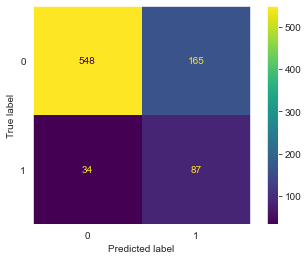

In [55]:
#Confusion Matrix
cnf_matrix = confusion_matrix(y_test,y_pred_alt_solv_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.grid(False);

AUC: 0.8143683423550822


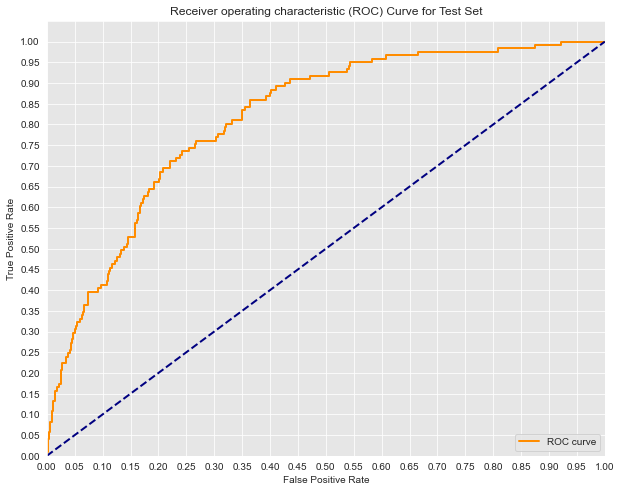

In [56]:
#AUC and ROC curve for the model with different solver and more iterations
pj.roc_auc(model_alt_solver, X_train_scaled, X_test_scaled, y_train, y_test)

This model metrics are slightly better to the model `model_reduce_regularization`.AUC is quite similar while recall increased by a percentage point to 72% pushing the F1 score up to 0.47. Tuning the solver, penalty as well as increasing the maximum iterations has led to a slight improvement to our model. Thus in comparison, it perfoms much better and as such is the best logistic model of the three we have looked at so far.

## Decision Tree model

Following on from the logistic regression model evaluation, we will now look into generating a decision tree model. We will follow similar steps of beginning with a vanilla decision tree model and then prune it to check if we can get better results. 

Unlike the logistic regression, we will not be scaling the features or applying resampling techniquea. As such, we will fit the decision tree to `X_train` and `y_train` datasets

In [57]:
# # Instantiate a Decision Tree model with criterion =entropy and randomstate = 10,

decision_tree_model= DecisionTreeClassifier(criterion = "entropy", random_state =10)

#Fit X_train and y_train

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [58]:
# Make predictions using the train and test data
y_pred_tree_train =decision_tree_model.predict(X_train)
y_pred_tree_test =decision_tree_model.predict(X_test)

In [59]:
#Evaluation metrics for the vanilla decision tree on train data 

pj.evaluation_metrics(y_train,y_pred_tree_train, decision_tree_model)

Precision for DecisionTreeClassifier(criterion='entropy', random_state=10) = 1.0


Recall for DecisionTreeClassifier(criterion='entropy', random_state=10) = 1.0


Accuracy for DecisionTreeClassifier(criterion='entropy', random_state=10) = 1.0


F1 score for DecisionTreeClassifier(criterion='entropy', random_state=10)  = 1.0


In [60]:
#Evaluation metrics for the vanilla decision tree on test data

pj.evaluation_metrics(y_test,y_pred_tree_test, decision_tree_model)

Precision for DecisionTreeClassifier(criterion='entropy', random_state=10) = 0.7614678899082569


Recall for DecisionTreeClassifier(criterion='entropy', random_state=10) = 0.6859504132231405


Accuracy for DecisionTreeClassifier(criterion='entropy', random_state=10) = 0.9232613908872902


F1 score for DecisionTreeClassifier(criterion='entropy', random_state=10)  = 0.7217391304347825


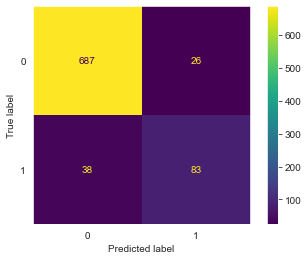

In [61]:
# Confusion Matrix

cnf_matrix = confusion_matrix(y_test,y_pred_tree_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.grid(False);

In [62]:
#calculate the AUC of the Decision _tree model
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_tree_test)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc

0.8247423875372365

From the evaluation metrics, the decision tree has a higher accuracy and precision compared to all of the logistic models generated thus far. This is quite evident in the confusion matrix plot above as the number of false positives is quite low at 26 customers. However, in terms of recall, it's much lower at 68% hence still misclassifying customers who have churned worser by the logistic regression . AUC is much higher hence showing the model is performing much better than all models looked at thus far.

Given this results, we will try and alter some of the hyperparameters in our decision tree to see if it improves our model's performance. As a start, let's have a look at the current model parameters.

In [63]:
#Checking the decision tree model paramaters

decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 10,
 'splitter': 'best'}

### Pruning the decision tree

In this section  we will prune the decision tree generated above by tuning some of its hyperparameters to increase its predictive performance. Given decision trees are more prone to overfitting, it is imperative to perform this step to reduce this likelihood. We will be looking at two hyperparameters:
 - **Max Depth** - Checking for the best depth parameter for our decision tree
 - **Max features** - Obtain the best max features for our decision tree
 
 a.`max_depth`
 
To check for the maximum depth, we will iterate over max_depth values ranging between 1 and 20 and train the decision tree for each depth value. Following this, we will calculate the training and test AUC for each run then plot a graph to show underfitting/overfitting as well as the optimal value 
 

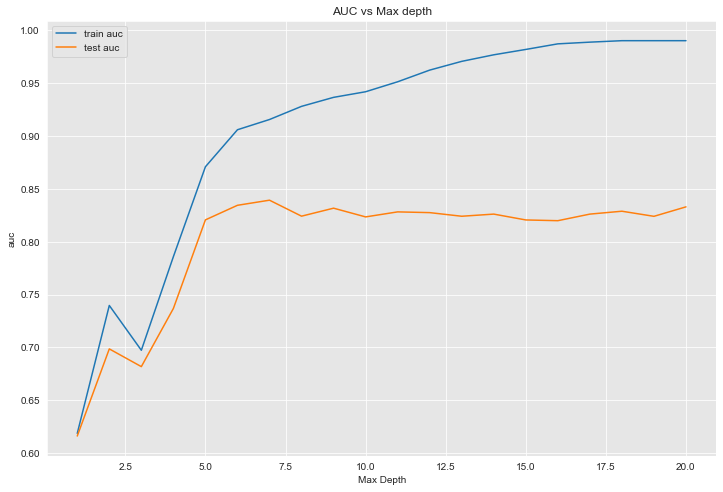

In [64]:
# Identify the optimal tree depth for given data
#Create an array for max_depth values ranging from 1 - 20
#In a loop, train the classifier for each depth value (20 runs)
#Calculate the training and test AUC for each run
#Plot a graph to show under/overfitting and the optimal value
max_depth = np.linspace(1, 20, 20, dtype = int)

auc_train =[]
auc_test =[]

for depth in max_depth:
    clf = DecisionTreeClassifier(criterion ="entropy", random_state = 10, max_depth = depth)
    clf.fit(X_train,y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train,y_pred_train)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test,y_pred_test)
    roc_auc_train = auc(false_positive_rate_train,true_positive_rate_train)
    roc_auc_test = auc(false_positive_rate_test,true_positive_rate_test)
    auc_train.append(roc_auc_train)
    auc_test.append(roc_auc_test)

fig, ax = plt.subplots(figsize =(12,8))

ax.plot(max_depth,auc_train, label = "train auc")
ax.plot(max_depth,auc_test, label = "test auc")
ax.set_xlabel("Max Depth")
ax.set_ylabel("auc")
ax.set_title("AUC vs Max depth")
ax.legend();


From the graph above, the training error decreases with increasing tree depth which definitely shows signs of overfitting. 
Test error increases after depth=7. Thus, there is nothing more to learn from deeper trees (some fluctuations, but not stable)
Hence the optimal value for `max_depth` is 7.

b. `max_features`

To check for the maximum features, we will iterate over `max_features` values ranging between 1 and 12 and train the decision tree for each depth value. Following this, we will calculate the training and test AUC for each run then plot a graph to show underfitting/overfitting as well as the optimal value

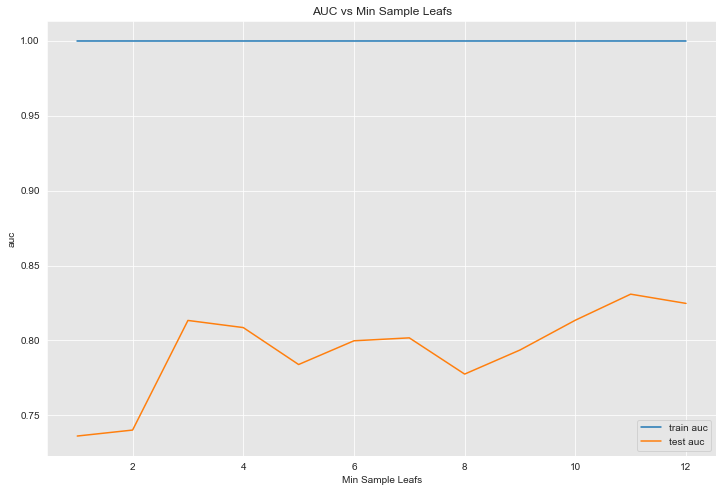

In [65]:
# Find the best value for optimal maximum feature size
#Create an array for max_features values ranging from 1 - 12 (1 feature vs all)
#In a loop, train the classifier for each max_features value (12 runs)
#Calculate the training and test AUC for each run
#Plot a graph to show under/overfitting and the optimal value

max_features = np.linspace(1, 12, 12, dtype =int)

auc_train =[]
auc_test =[]

for feature in max_features:
    clf = DecisionTreeClassifier(criterion ="entropy", random_state = 10, max_features = feature)
    clf.fit(X_train,y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = roc_curve(y_train,y_pred_train)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(y_test,y_pred_test)
    roc_auc_train = auc(false_positive_rate_train,true_positive_rate_train)
    roc_auc_test = auc(false_positive_rate_test,true_positive_rate_test)
    auc_train.append(roc_auc_train)
    auc_test.append(roc_auc_test)

fig, ax = plt.subplots(figsize =(12,8))

ax.plot(max_features,auc_train, label = "train auc")
ax.plot(max_features,auc_test, label = "test auc")
ax.set_xlabel("Min Sample Leafs")
ax.set_ylabel("auc")
ax.set_title("AUC vs Min Sample Leafs")
ax.legend();

From the graph above, we see no effect on the training dataset when varying the maximum features as the training AUC remains flat. On the otherhand, there are fluctuations observed in the test AUC there is a bit of fluctuations 0bserved with the  optimal value being 11.

### Pruned Decision Tree


With these two updated values`max_depth`=7, `max_features`=11  to retrain the decision tree and check whether it improves the predictive power.

In [66]:
pruned_decision_tree_model = DecisionTreeClassifier(criterion ="entropy", random_state = 10, max_depth = 7, max_features = 11)
pruned_decision_tree_model.fit(X_train,y_train)

y_pred_tuned_dt = pruned_decision_tree_model.predict(X_test)

In [67]:
#Evaluation metrics for the decision tree model after pruning

pj.evaluation_metrics(y_test,y_pred_tuned_dt, pruned_decision_tree_model)

Precision for DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=11,
                       random_state=10) = 0.8316831683168316


Recall for DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=11,
                       random_state=10) = 0.6942148760330579


Accuracy for DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=11,
                       random_state=10) = 0.935251798561151


F1 score for DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=11,
                       random_state=10)  = 0.7567567567567568


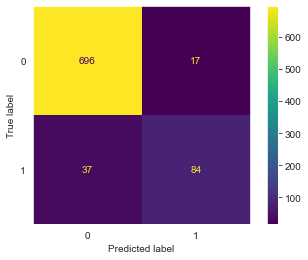

In [68]:
# Confusion Matrix

cnf_matrix = confusion_matrix(y_test,y_pred_tuned_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.grid(False);

In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_tuned_dt)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc


0.8351859793910029

Using the pruned decision tree gave us better metrics compared to the vanilla decision tree model. AUC score was much higher as well as the precision, accuracy, F1 score and recall. Taking all metrics into consideration, this pruned decision tree model seems to be performing the better than the vanilla decision tree model.

### Evaluating the models

Let's compile all our findings from all the models and plot them to get a better view of how the models compare against each other as well as against our success metrics. 


In [70]:
#Compiling all model results and saving them as a DataFrame

summary_results= {"model":["LR_baseline_model","LR_model_balanced_weights","LR_model with increased regularization",
                           "LR_model_Alternative solver","DT_Decision Tree model","DT_Pruned Decision Tree Model"],    
                "precision":[0.5370370370370371,0.3412698412698413,0.344,0.34523809523809523,0.7614678899082569,
                            0.8316831683168316],   
                "recall":[0.2396694214876033, 0.7107438016528925,0.7107438016528925,0.71900826446281,0.6859504132231405,
                         0.6942148760330579],    
                "accuracy":[0.8597122302158273,0.7589928057553957,0.7613908872901679,0.7613908872901679,0.9232613908872902,
                           0.935251798561151],    
                "F1 score":[0.3314285714285715,0.4611260053619303,0.46361185983827485,0.4664879356568364,0.7217391304347825,
                           0.7567567567567568],   
                "AUC Score":[0.8110416932296316,0.814426297914759,0.8144842534744359,0.8143683423550822,0.8247423875372365,
                             0.8351859793910029]}

summary_df = pd.DataFrame.from_dict(summary_results)
summary_df


,model,precision,recall,accuracy,F1 score,AUC Score
0,LR_baseline_model,0.537037,0.239669,0.859712,0.331429,0.811042
1,LR_model_balanced_weights,0.341270,0.710744,0.758993,0.461126,0.814426
2,LR_model with increased regularization,0.344000,0.710744,0.761391,0.463612,0.814484
3,LR_model_Alternative solver,0.345238,0.719008,0.761391,0.466488,0.814368
4,DT_Decision Tree model,0.761468,0.685950,0.923261,0.721739,0.824742
5,DT_Pruned Decision Tree Model,0.831683,0.694215,0.935252,0.756757,0.835186


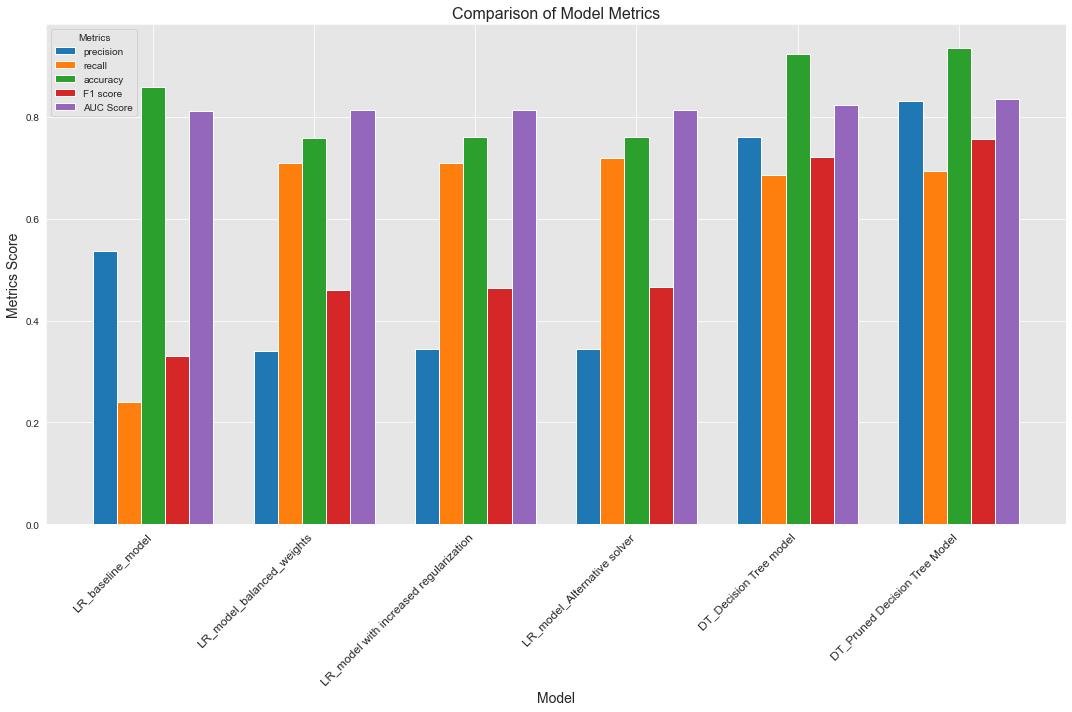

In [71]:
# Plot to summarize all the metric results for the models
metrics = ['precision', 'recall', 'accuracy', 'F1 score', 'AUC Score']
models = summary_df['model']
x = np.arange(len(models)) 

plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics):
    plt.bar(x + i * 0.15, summary_df[metric], width=0.15, label=metric)

plt.xticks(x + 0.3, models, rotation=45, ha='right', fontsize=12)
plt.ylabel('Metrics Score', fontsize=14)
plt.xlabel("Model",fontsize= 14)
plt.title('Comparison of Model Metrics', fontsize=16)
plt.legend(title='Metrics')
plt.tight_layout()


From the bargraph above, we observe that the decision tree models perform way better than the logistic regression models. Let's check how the models performed against our metrics of success:

 - **Accuracy** of between 75% and 85% is desired : All the models evaluated were able to meet this threshold
 - Precision of between 50% and 60% is desired: Only the baseline logistic model and the decision tree models met this threshold. The baseline logistic regression model was within this range while both decision tree models(unpruned and pruned) were able to surpass it. 
 - **Recall** of between 60% and 70% is desired. All the models were able to meet this criteria except the baseline logistic regression model. Logisitic models containing tuned hyper parameters performed the best i.e model with alternative solver, model with balalnced weights and model with less regularization 
 - **F1 score** of between 0.55 and 0.65 is highly desirable: Only the descision tree models were able to meet this criteria. Due to the precision scores being low, all logistic regression models had a F1 score less than 0.5
 - **Area under the curve (AUC)**: A higher result indicates a more accurate model performance. The pruned decision tree had the highest AUC. However, the differences observed across all models evaluated was quite minimal.


Taking all this account, we can conclude that the pruned decision tree model meets all the metrics of success. It strikes a balance across precision and recall. Thus, it will be able to give a balanced view of customers who will churn as well as those who will not churn. Also the accuracy score, is the highest as well as the AUC making it the model that has the most accurate predictive performance.

## Business Recommendation

Below are the business recommendations for SyriaTel based on the analysis performed:

- SyriaTel should go for the pruned decision tree model when predicting whether a customer will churn. It will be able to give the most accurate predictive view of customers who will churn. This model provides a balanced view across all the evaluation metrics and it's easy to interpret the model results to stakeholders in the company.

- Key factors making customers leave SyriaTel are high international calling charges, day charges and poor customer service. Customers who left made the highest numner of day and international calls but their charges were still quite high. In addition, cutomers who made more calls to customer service were more likely to leave as opposed to those who did not.

- SyriaTel can reduce customer churn by reducing their day and international calling charges as they seem to be highly uncompetitive. They could come up with discount schemes to reward customers who call more often. It should also improve on their customer service through training of it's customer care agents. Finally, it should improve its service in general across the board to ensure calls by customers to customer care are reduced to a minimum.



## Conclusion

This analysis looked at SyriaTel customer data to determine a predictive customer churn model. In addition, customer's patterns have been studied to determine the reason behind customers leaving and ways in which this can be mitigated. The pruned decision tree model has been found to be the best predictive model for the data analysed as it gives the most accurate and balanced view of when a customer will churn. Moreover, customers in SyriaTel churned because of high calling charges as well as poor customer service. It is imperative for the company to offer deals in the form of discounts to customers who call much more often and improve their customer service by training their customer service agents. 


## Next steps

Deployment of the model to end users is the next step. The model is to be exported into a format suitable for integration through embedding it into a software application (such as web or mobile application) where end users can input their data and receive predictions.

Other sophisticated models need to be considered such as Random forest, XG Boost to get better predictive perfomance. In addition a much bigger dataset should be sought to increase the training and predictive power of the model.
